In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

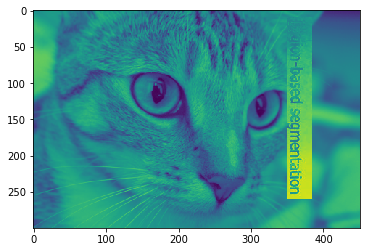

In [5]:
dict_ = data.page()
cat = data.chelsea()
cat= cv2.cvtColor(cat , cv2.COLOR_RGB2GRAY)
roi = cat[10:260,350:385]
dict_crop = dict_[:35,:300]
dict_crop = cv2.resize(dict_crop,(250,35))
dcr = cv2.rotate(dict_crop,cv2.ROTATE_90_CLOCKWISE)
row,col = dcr.shape

# mask와 maskinv 만들기
ret, mask = cv2.threshold(dcr,115,255,cv2.THRESH_BINARY)
dcr_gray_inv = cv2.bitwise_not(mask)
bg = cv2.bitwise_and(roi,roi,mask= dcr_gray_inv)
fg = cv2.bitwise_and(dcr,dcr, mask = mask)
dst = cv2.add(bg,fg)
cat[10:260,350:385] = dst
plt.imshow(cat)